<a href="https://colab.research.google.com/github/n-miera/Vehicle-accident-prediction/blob/main/Vehicle_accident_prediction_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vehicle accident prediction algorithm

---
source: https://www.youtube.com/watch?v=NUXdtN1W1FE


## Uploading dataset

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io

#url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'


Saving accident_ds.csv to accident_ds.csv


In [ ]:
accident_df_raw = pd.read_csv(io.BytesIO(uploaded['accident_ds.csv']))

In [ ]:
accident_df_raw

,TAHUN,NEGERI,JUMLAH \nKMLG,JUMLAH \nKMLG \nMAUT,JUMLAH \nKMLG \nPARAH,JUMLAH \nKMLG \nRINGAN,JUMLAH \nKMLG \nROSAK \nSAHAJA,JUMLAH \nKEMATIAN,JUMLAH \nCEDERA \nPARAH,JUMLAH \nCEDERA \nRINGAN
0,2011,PERLIS,1791,73,231,246,1241,79,259,288
1,2011,KEDAH,19699,506,499,1023,17671,515,608,1329
2,2011,PULAU PINANG,37158,375,160,320,36303,392,197,380
3,2011,PERAK,33506,739,700,1267,30800,811,898,1631
4,2011,SELANGOR,128876,1015,457,689,126715,1070,566,807
...,...,...,...,...,...,...,...,...,...,...
135,2021,PAHANG,8071,161,109,501,7300,176,129,189
136,2021,KELANTAN,4403,130,91,794,3388,133,102,803
137,2021,TERENGGANU,4539,93,71,87,4288,106,80,89
138,2021,SABAH,7159,99,90,107,6863,118,106,122


## Renaming columns

In [ ]:
#.rename
accident_df = accident_df_raw.rename(
        columns = {'TAHUN':'Year'
                   ,'NEGERI':'State'
                   ,'JUMLAH \nKMLG':'Total accident'
                   ,'JUMLAH \nKMLG \nMAUT':'Total death accident'
                   ,'JUMLAH \nKMLG \nPARAH':'Total critical accident'
                   ,'JUMLAH \nKMLG \nRINGAN':'Total minor accident'
                   ,'JUMLAH \nKMLG \nROSAK \nSAHAJA':'Total damage only accident'
                   ,'JUMLAH \nKEMATIAN':'Total death'
                   ,'JUMLAH \nCEDERA \nPARAH':'Total minor injury'
                   ,'JUMLAH \nCEDERA \nRINGAN':'Total major injury'
                   }
        )
accident_df

,Year,State,Total accident,Total death accident,Total critical accident,Total minor accident,Total damage only accident,Total death,Total minor injury,Total major injury
0,2011,PERLIS,1791,73,231,246,1241,79,259,288
1,2011,KEDAH,19699,506,499,1023,17671,515,608,1329
2,2011,PULAU PINANG,37158,375,160,320,36303,392,197,380
3,2011,PERAK,33506,739,700,1267,30800,811,898,1631
4,2011,SELANGOR,128876,1015,457,689,126715,1070,566,807
...,...,...,...,...,...,...,...,...,...,...
135,2021,PAHANG,8071,161,109,501,7300,176,129,189
136,2021,KELANTAN,4403,130,91,794,3388,133,102,803
137,2021,TERENGGANU,4539,93,71,87,4288,106,80,89
138,2021,SABAH,7159,99,90,107,6863,118,106,122


## Algorithm production

### Choosing columns to use

all columns will be used

In [ ]:
#Choosing all columns for SELANGOR only for the prediction process
X = accident_df[accident_df['State']=='SELANGOR']
y = X[["Year","Total death"]]
X = X.iloc[:,:-3].values
y = y.iloc[:,1].values
y

array([1070, 1102, 1019, 1068, 1028, 1087, 1046, 1054,  805,  436])

<ipython-input-53-4b6503724e52>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(accident_df.corr())


<Axes: >

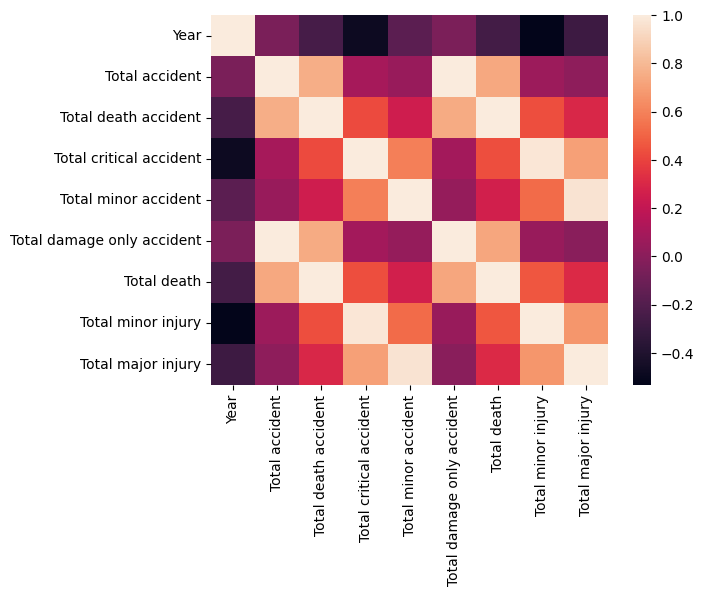

In [ ]:
sns.heatmap(accident_df.corr())

## Turning State column into readable numeric form

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer 

labelencoder = LabelEncoder()
X[:,1] = labelencoder.fit_transform(X[:,1])
X

array([[2011, 0, 128876, 1015, 457, 689, 126715],
       [2012, 0, 129106, 1053, 408, 693, 126952],
       [2013, 0, 135024, 964, 164, 356, 133540],
       [2014, 0, 137809, 1027, 194, 301, 136287],
       [2015, 0, 140957, 975, 190, 187, 139605],
       [2017, 0, 154958, 1047, 239, 147, 153525],
       [2018, 0, 163078, 1004, 242, 188, 161644],
       [2019, 0, 168222, 1008, 353, 447, 166414],
       [2020, 0, 123230, 764, 411, 1973, 120082],
       [2021, 0, 60370, 367, 308, 954, 58688]], dtype=object)

## Creating Linear Regression model

### Splitting data into training and testing data

In [ ]:
#from sqlalchemy import false
#from sklearn.model_selection import train_test_split
#X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=false)
#X_trainLR
import numpy as np
X_split = np.array(X)
y_split = np.array(y)
X_traintestsplit = np.split(X_split, [8])
y_traintestsplit = np.split(y_split, [8])
X_trainLR = X_traintestsplit[0]
X_testLR = X_traintestsplit[1]
y_trainLR = y_traintestsplit[0]
y_testLR = y_traintestsplit[1]
y_testLR

array([805, 436])

### Fitting model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_trainLR, y_trainLR)

LinearRegression()

In [ ]:
y_predLR = regressor.predict(X_testLR)
y_predLR

array([884.09976209, 604.93121502])

### Checking the coeffecient and intercept created from model
-> Y = mx + c

In [ ]:
regressor.coef_

array([ 2.03210660e+00, -3.82174544e-13,  1.70883631e-01,  6.44033577e-01,
       -1.29142223e-01, -1.72539727e-01, -1.71467995e-01])

In [ ]:
regressor.intercept_

-3787.0689516627426

### R squared score
If score is higher than 90%, then this proves that the model generated is a good model and can most possibly be used to continue prediction

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_testLR, y_predLR)

0.4889207956709637

## Creating using SVM Regression model

### Splitting training and testing

In [ ]:
X_split = np.array(X)
y_split = np.array(y)
X_traintestsplit = np.split(X_split, [8])
y_traintestsplit = np.split(y_split, [8])
X_trainSVR = X_traintestsplit[0]
X_testSVR = X_traintestsplit[1]
y_trainSVR = y_traintestsplit[0]
y_testSVR = y_traintestsplit[1]
y_testSVR

array([805, 436])

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr.fit(X_trainSVR, y_trainSVR)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [ ]:
y_predSVR = svr.predict(X_testSVR)
y_predSVR

array([1061.42111082, 1061.42111082])

In [ ]:
r2_score(y_testSVR, y_predSVR)

-5.711222037528995

In [ ]:
y_testSVR

array([805, 436])

## Creating using Neural Network with Regression

### Splitting training and testing data

In [ ]:
X_split = np.array(X)
y_split = np.array(y)
X_traintestsplit = np.split(X_split, [8])
y_traintestsplit = np.split(y_split, [8])
X_trainNN = X_traintestsplit[0]
X_testNN = X_traintestsplit[1]
y_trainNN = y_traintestsplit[0]
y_testNN = y_traintestsplit[1]
y_testNN

array([805, 436])

### Training and Testing model

In [ ]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(random_state=0, max_iter=500).fit(X_trainNN, y_trainNN)

In [ ]:
y_predNN = nn.predict(X_testNN[:])
y_predNN

array([2692.92807491, 1369.60672805])

In [ ]:
r2_score(y_testNN, y_predNN)

-64.15660047601723

## Plotting predicted numbers into a time series graph

###Actual dataset dataframe

In [ ]:
df1 = pd.DataFrame(X_trainLR)
df1['Total death'] = y_trainLR
df2 = pd.DataFrame(X_testLR)
df2['Total death'] = y_testLR
comb = [df1,df2]
df_actual = pd.concat(comb)
df_actual.sort_values(0,ascending=True)

,0,1,2,3,4,5,6,Total death
0,2011,0,128876,1015,457,689,126715,1070
1,2012,0,129106,1053,408,693,126952,1102
2,2013,0,135024,964,164,356,133540,1019
3,2014,0,137809,1027,194,301,136287,1068
4,2015,0,140957,975,190,187,139605,1028
5,2017,0,154958,1047,239,147,153525,1087
6,2018,0,163078,1004,242,188,161644,1046
7,2019,0,168222,1008,353,447,166414,1054
0,2020,0,123230,764,411,1973,120082,805
1,2021,0,60370,367,308,954,58688,436


###Linear Regression

####Combining dataframes to create data for plotting

In [ ]:
df1 = pd.DataFrame(X_trainLR)
df1['Total death'] = y_trainLR
df3 = pd.DataFrame(X_testLR)
df3['Total death'] = y_predLR
comb = [df1,df3]
df_pred = pd.concat(comb)
df_pred.sort_values(0,ascending=True)

,0,1,2,3,4,5,6,Total death
0,2011,0,128876,1015,457,689,126715,1070.000000
1,2012,0,129106,1053,408,693,126952,1102.000000
2,2013,0,135024,964,164,356,133540,1019.000000
3,2014,0,137809,1027,194,301,136287,1068.000000
4,2015,0,140957,975,190,187,139605,1028.000000
5,2017,0,154958,1047,239,147,153525,1087.000000
6,2018,0,163078,1004,242,188,161644,1046.000000
7,2019,0,168222,1008,353,447,166414,1054.000000
0,2020,0,123230,764,411,1973,120082,884.099762
1,2021,0,60370,367,308,954,58688,604.931215


####Graph of Linear Regression


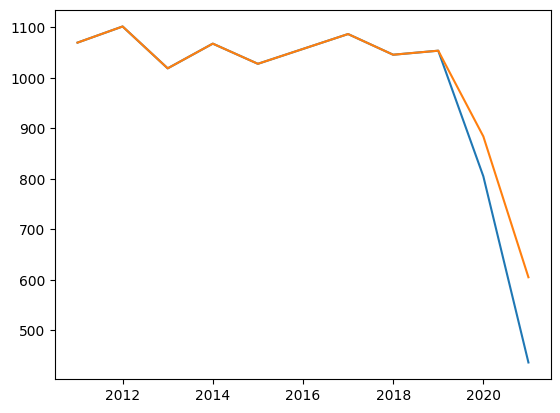

In [ ]:
import matplotlib.pyplot as plt

acc = df_actual[[0,'Total death']]
yearonly = accident_df['Year']
x1 = yearonly.drop_duplicates()
y1 = df_actual.groupby(0)['Total death'].sum()
y2 = df_pred.groupby(0)['Total death'].sum()
plt.plot(x1, y1)
plt.plot(x1,y2)
plt.plot()
plt.show()

### Neural Network

####Combining dataframes to create data for plotting

In [ ]:
df1 = pd.DataFrame(X_trainNN)
df1['Total death'] = y_trainNN
df3 = pd.DataFrame(X_testNN)
df3['Total death'] = y_predNN
comb = [df1,df3]
df_pred = pd.concat(comb)
df_pred.sort_values(0,ascending=True)

,0,1,2,3,4,5,6,Total death
0,2011,0,128876,1015,457,689,126715,1070.000000
1,2012,0,129106,1053,408,693,126952,1102.000000
2,2013,0,135024,964,164,356,133540,1019.000000
3,2014,0,137809,1027,194,301,136287,1068.000000
4,2015,0,140957,975,190,187,139605,1028.000000
5,2017,0,154958,1047,239,147,153525,1087.000000
6,2018,0,163078,1004,242,188,161644,1046.000000
7,2019,0,168222,1008,353,447,166414,1054.000000
0,2020,0,123230,764,411,1973,120082,2692.928075
1,2021,0,60370,367,308,954,58688,1369.606728


####Graph of Neural Network

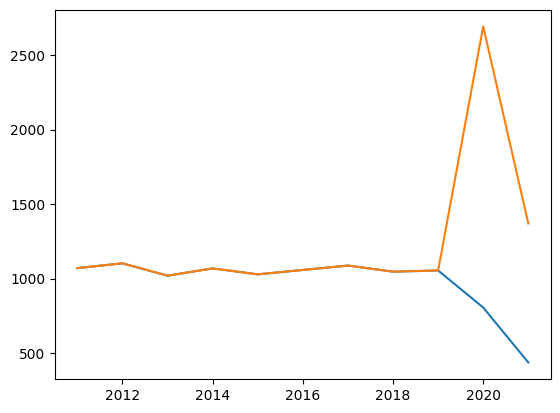

In [ ]:
import matplotlib.pyplot as plt

acc = df_actual[[0,'Total death']]
yearonly = accident_df['Year']
x1 = yearonly.drop_duplicates()
y1 = df_actual.groupby(0)['Total death'].sum()
y2 = df_pred.groupby(0)['Total death'].sum()
plt.plot(x1, y1)
plt.plot(x1,y2)
plt.plot()
plt.show()

### Support Vector Regression

####Combining dataframes to create data for plotting

In [ ]:
df1 = pd.DataFrame(X_trainSVR)
df1['Total death'] = y_trainSVR
df3 = pd.DataFrame(X_testSVR)
df3['Total death'] = y_predSVR
comb = [df1,df3]
df_pred = pd.concat(comb)
df_pred.sort_values(0,ascending=True)

,0,1,2,3,4,5,6,Total death
0,2011,0,128876,1015,457,689,126715,1070.000000
1,2012,0,129106,1053,408,693,126952,1102.000000
2,2013,0,135024,964,164,356,133540,1019.000000
3,2014,0,137809,1027,194,301,136287,1068.000000
4,2015,0,140957,975,190,187,139605,1028.000000
5,2017,0,154958,1047,239,147,153525,1087.000000
6,2018,0,163078,1004,242,188,161644,1046.000000
7,2019,0,168222,1008,353,447,166414,1054.000000
0,2020,0,123230,764,411,1973,120082,1061.421111
1,2021,0,60370,367,308,954,58688,1061.421111


####Graph of Support Vector Regression

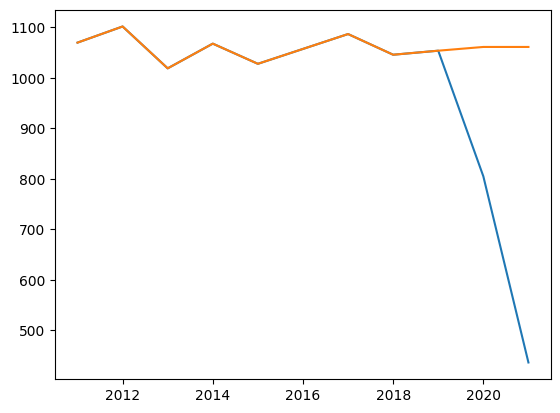

In [ ]:
import matplotlib.pyplot as plt

acc = df_actual[[0,'Total death']]
yearonly = accident_df['Year']
x1 = yearonly.drop_duplicates()
y1 = df_actual.groupby(0)['Total death'].sum()
y2 = df_pred.groupby(0)['Total death'].sum()
plt.plot(x1, y1)
plt.plot(x1,y2)
plt.plot()
plt.show()